In [22]:
import sys
import os

# Añade el directorio padre al sys.path
sys.path.append(os.path.abspath("/eos/home-d/dcostasr/SWAN_projects/2025_data"))
sys.path.append('/eos/home-d/dcostasr/SWAN_projects/software/hipy')

from wcte.brbtools import sort_run_files, get_part_files, select_good_parts
# from wcte.brbtools import create_big_df, df_extend
from wcte.brbtools import concat_dfs, df_extend
from wcte.mapping  import id_names

%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hipy.pltext as pltext


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
run = 1444
map = id_names

run_files  = sort_run_files(f"/eos/experiment/wcte/data/2025_commissioning/offline_data/{run}/WCTE_offline_R{run}S*P*.root")
part_files = get_part_files(run_files)

In [ ]:
# Second Approach: 
# - Creating a DataFrame for every part file
# - Concatening everything
# - Creating one big event summary dataframe
# - Slower
# - Surprising. Maybe I'm doing something wrong
# df_all = create_big_df(part_files, run_files, map)

1. Selection of good parts


Selecting Good Parts: 100%|██████████| 324/324 [00:05<00:00, 57.80it/s]


2. Create and concatenate all the DataFrames in the Run


Creating DataFrames For Each Part: 100%|██████████| 265/265 [01:27<00:00,  3.02it/s]


3. Create the Final big DataFrame with all monitors information


In [ ]:
# First Approach: 
# - Creating a DataFrame for every part file
# - Creating an event summary dataframe for every part file
# - Concat Everything
# - Faster
df_all = concat_dfs(select_good_parts(part_files, run_files), run_files, map)

Creating DataFrames For Each Part: 100%|██████████| 265/265 [01:30<00:00,  2.94it/s]


In [ ]:
cols = df_all.columns.tolist()
cols.insert(1, cols.pop(cols.index('evt_number')))
cols.insert(2, cols.pop(cols.index('window_time')))
cols.insert(3, cols.pop(cols.index('part_number')))
df_all = df_all[cols]

,evt,evt_number,window_time,part_number,ACT0-L_nhits,ACT0-L_charge,ACT0-L_time,ACT0-R_nhits,ACT0-R_charge,ACT0-R_time,ACT1-L_nhits,ACT1-L_charge,ACT1-L_time,ACT1-R_nhits,ACT1-R_charge,ACT1-R_time,NC_nhits,NC_charge,NC_time,ACT2-L_nhits,ACT2-L_charge,ACT2-L_time,ACT2-R_nhits,ACT2-R_charge,ACT2-R_time,ACT3-L_nhits,ACT3-L_charge,ACT3-L_time,ACT3-R_nhits,ACT3-R_charge,ACT3-R_time,ACT4-L_nhits,ACT4-L_charge,ACT4-L_time,ACT4-R_nhits,ACT4-R_charge,ACT4-R_time,ACT5-L_nhits,ACT5-L_charge,ACT5-L_time,ACT5-R_nhits,ACT5-R_charge,ACT5-R_time,T1-0L_nhits,T1-0L_charge,T1-0L_time,T1-0R_nhits,T1-0R_charge,T1-0R_time,T1-1L_nhits,T1-1L_charge,T1-1L_time,T1-1R_nhits,T1-1R_charge,T1-1R_time,HC-0_nhits,HC-0_charge,HC-0_time,HC-1_nhits,HC-1_charge,HC-1_time,Trigger-130_nhits,Trigger-130_charge,Trigger-130_time,Trigger-131_nhits,Trigger-131_charge,Trigger-131_time,Lemo-1_nhits,Lemo-1_charge,Lemo-1_time,Lemo-2_nhits,Lemo-2_charge,Lemo-2_time,Lemo-3_nhits,Lemo-3_charge,Lemo-3_time,Lemo-4_nhits,Lemo-4_charge,Lemo-4_time,Lemo-5_nhits,Lemo-5_charge,Lemo-5_time,Lemo-6_nhits,Lemo-6_charge,Lemo-6_time,Laser_nhits,Laser_charge,Laser_time,T2_nhits,T2_charge,T2_time,T3_nhits,T3_charge,T3_time,T0-0L_nhits,T0-0L_charge,T0-0L_time,T0-0R_nhits,T0-0R_charge,T0-0R_time,T0-1L_nhits,T0-1L_charge,T0-1L_time,T0-1R_nhits,T0-1R_charge,T0-1R_time,PbG_nhits,PbG_charge,PbG_time,MuL_nhits,MuL_charge,MuL_time,MuR_nhits,MuR_charge,MuR_time,TOF-0_nhits,TOF-0_charge,TOF-0_time,TOF-1_nhits,TOF-1_charge,TOF-1_time,TOF-2_nhits,TOF-2_charge,TOF-2_time,TOF-3_nhits,TOF-3_charge,TOF-3_time,TOF-4_nhits,TOF-4_charge,TOF-4_time,TOF-5_nhits,TOF-5_charge,TOF-5_time,TOF-6_nhits,TOF-6_charge,TOF-6_time,TOF-7_nhits,TOF-7_charge,TOF-7_time,TOF-8_nhits,TOF-8_charge,TOF-8_time,TOF-9_nhits,TOF-9_charge,TOF-9_time,TOF-A_nhits,TOF-A_charge,TOF-A_time,TOF-B_nhits,TOF-B_charge,TOF-B_time,TOF-C_nhits,TOF-C_charge,TOF-C_time,TOF-D_nhits,TOF-D_charge,TOF-D_time,TOF-E_nhits,TOF-E_charge,TOF-E_time,TOF-F_nhits,TOF-F_charge,TOF-F_time,T4-L_nhits,T4-L_charge,T4-L_time,T4-R_nhits,T4-R_charge,T4-R_time,Trigger-132_nhits,Trigger-132_charge,Trigger-132_time
0,0,0,5.594334e+09,0,1.0,712.0,2240.638672,1.0,235.0,2239.316650,1.0,2440.0,2241.186279,1.0,1512.0,2247.778564,NaN,NaN,NaN,1.0,2095.0,2239.987305,1.0,503.0,2249.113647,1.0,5805.0,2242.817871,1.0,3765.0,2241.791748,1.0,5683.0,2240.547363,1.0,1562.0,2240.462891,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3900.0,3092.003662,3.0,8572.0,2954.330485,2.0,3659.0,3873.479309,2.0,2381.0,2347.690613,NaN,NaN,NaN,NaN,NaN,NaN,1.0,869.0,2397.912354,1.0,1742.0,2406.548950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1461.0,2356.354431,2.0,2385.0,2317.780457,1.0,1404.0,2203.611694,1.0,1889.0,2202.545410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,821.0,2224.297729,1.0,513.0,2224.750977,1.0,921.0,2397.657104
1,1,1,5.604793e+09,0,1.0,624.0,2242.008057,NaN,NaN,NaN,2.0,3298.0,3005.834351,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2831.0,2246.209351,1.0,767.0,2243.116089,1.0,2405.0,2246.240479,1.0,3953.0,2243.943359,NaN,NaN,NaN,5.0,8067.0,2134.593237,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5471.0,2355.296814,3.0,3773.0,3101.714355,3.0,4828.0,2953.895508,1.0,1925.0,2210.600464,NaN,NaN,NaN,NaN,NaN,NaN,1.0,867.0,2397.893066,1.0,1768.0,2406.519653,1.0,1132.0,2367.578003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2111.0,2205.526611,2.0,2989.0,2349.199097,2.0,1487.0,2542.690979,2.0,1857.0,2352.242554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1054.0,2241.736694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1267.0,2242.446045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1123.0,2225.231934,1.0,652.0,2225.813599,1.0,925.0,2397.728760
2,2,2,5.60934

In [21]:
df_all

,evt,evt_number,window_time,part_number,ACT0-L_nhits,ACT0-L_charge,ACT0-L_time,ACT0-R_nhits,ACT0-R_charge,ACT0-R_time,ACT1-L_nhits,ACT1-L_charge,ACT1-L_time,ACT1-R_nhits,ACT1-R_charge,ACT1-R_time,NC_nhits,NC_charge,NC_time,ACT2-L_nhits,ACT2-L_charge,ACT2-L_time,ACT2-R_nhits,ACT2-R_charge,ACT2-R_time,ACT3-L_nhits,ACT3-L_charge,ACT3-L_time,ACT3-R_nhits,ACT3-R_charge,ACT3-R_time,ACT4-L_nhits,ACT4-L_charge,ACT4-L_time,ACT4-R_nhits,ACT4-R_charge,ACT4-R_time,ACT5-L_nhits,ACT5-L_charge,ACT5-L_time,ACT5-R_nhits,ACT5-R_charge,ACT5-R_time,T1-0L_nhits,T1-0L_charge,T1-0L_time,T1-0R_nhits,T1-0R_charge,T1-0R_time,T1-1L_nhits,T1-1L_charge,T1-1L_time,T1-1R_nhits,T1-1R_charge,T1-1R_time,HC-0_nhits,HC-0_charge,HC-0_time,HC-1_nhits,HC-1_charge,HC-1_time,Trigger-130_nhits,Trigger-130_charge,Trigger-130_time,Trigger-131_nhits,Trigger-131_charge,Trigger-131_time,Lemo-1_nhits,Lemo-1_charge,Lemo-1_time,Lemo-2_nhits,Lemo-2_charge,Lemo-2_time,Lemo-3_nhits,Lemo-3_charge,Lemo-3_time,Lemo-4_nhits,Lemo-4_charge,Lemo-4_time,Lemo-5_nhits,Lemo-5_charge,Lemo-5_time,Lemo-6_nhits,Lemo-6_charge,Lemo-6_time,Laser_nhits,Laser_charge,Laser_time,T2_nhits,T2_charge,T2_time,T3_nhits,T3_charge,T3_time,T0-0L_nhits,T0-0L_charge,T0-0L_time,T0-0R_nhits,T0-0R_charge,T0-0R_time,T0-1L_nhits,T0-1L_charge,T0-1L_time,T0-1R_nhits,T0-1R_charge,T0-1R_time,PbG_nhits,PbG_charge,PbG_time,MuL_nhits,MuL_charge,MuL_time,MuR_nhits,MuR_charge,MuR_time,TOF-0_nhits,TOF-0_charge,TOF-0_time,TOF-1_nhits,TOF-1_charge,TOF-1_time,TOF-2_nhits,TOF-2_charge,TOF-2_time,TOF-3_nhits,TOF-3_charge,TOF-3_time,TOF-4_nhits,TOF-4_charge,TOF-4_time,TOF-5_nhits,TOF-5_charge,TOF-5_time,TOF-6_nhits,TOF-6_charge,TOF-6_time,TOF-7_nhits,TOF-7_charge,TOF-7_time,TOF-8_nhits,TOF-8_charge,TOF-8_time,TOF-9_nhits,TOF-9_charge,TOF-9_time,TOF-A_nhits,TOF-A_charge,TOF-A_time,TOF-B_nhits,TOF-B_charge,TOF-B_time,TOF-C_nhits,TOF-C_charge,TOF-C_time,TOF-D_nhits,TOF-D_charge,TOF-D_time,TOF-E_nhits,TOF-E_charge,TOF-E_time,TOF-F_nhits,TOF-F_charge,TOF-F_time,T4-L_nhits,T4-L_charge,T4-L_time,T4-R_nhits,T4-R_charge,T4-R_time,Trigger-132_nhits,Trigger-132_charge,Trigger-132_time
0,0,0,5.594334e+09,0,1.0,712.0,2240.638672,1.0,235.0,2239.316650,1.0,2440.0,2241.186279,1.0,1512.0,2247.778564,NaN,NaN,NaN,1.0,2095.0,2239.987305,1.0,503.0,2249.113647,1.0,5805.0,2242.817871,1.0,3765.0,2241.791748,1.0,5683.0,2240.547363,1.0,1562.0,2240.462891,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3900.0,3092.003662,3.0,8572.0,2954.330485,2.0,3659.0,3873.479309,2.0,2381.0,2347.690613,NaN,NaN,NaN,NaN,NaN,NaN,1.0,869.0,2397.912354,1.0,1742.0,2406.548950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1461.0,2356.354431,2.0,2385.0,2317.780457,1.0,1404.0,2203.611694,1.0,1889.0,2202.545410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,821.0,2224.297729,1.0,513.0,2224.750977,1.0,921.0,2397.657104
1,1,1,5.604793e+09,0,1.0,624.0,2242.008057,NaN,NaN,NaN,2.0,3298.0,3005.834351,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2831.0,2246.209351,1.0,767.0,2243.116089,1.0,2405.0,2246.240479,1.0,3953.0,2243.943359,NaN,NaN,NaN,5.0,8067.0,2134.593237,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5471.0,2355.296814,3.0,3773.0,3101.714355,3.0,4828.0,2953.895508,1.0,1925.0,2210.600464,NaN,NaN,NaN,NaN,NaN,NaN,1.0,867.0,2397.893066,1.0,1768.0,2406.519653,1.0,1132.0,2367.578003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2111.0,2205.526611,2.0,2989.0,2349.199097,2.0,1487.0,2542.690979,2.0,1857.0,2352.242554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1054.0,2241.736694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1267.0,2242.446045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1123.0,2225.231934,1.0,652.0,2225.813599,1.0,925.0,2397.728760
2,2,2,5.60934

In [23]:
df_extended = df_extend(df_all, 6)

/eos/home-d/dcostasr/SWAN_projects/2025_data/wcte/brbtools.py:197: RuntimeWarning: Mean of empty slice
  # Add Column


In [24]:
df_extended

,evt,evt_number,window_time,part_number,ACT0-L_nhits,ACT0-L_charge,ACT0-L_time,ACT0-R_nhits,ACT0-R_charge,ACT0-R_time,ACT1-L_nhits,ACT1-L_charge,ACT1-L_time,ACT1-R_nhits,ACT1-R_charge,ACT1-R_time,NC_nhits,NC_charge,NC_time,ACT2-L_nhits,ACT2-L_charge,ACT2-L_time,ACT2-R_nhits,ACT2-R_charge,ACT2-R_time,ACT3-L_nhits,ACT3-L_charge,ACT3-L_time,ACT3-R_nhits,ACT3-R_charge,ACT3-R_time,ACT4-L_nhits,ACT4-L_charge,ACT4-L_time,ACT4-R_nhits,ACT4-R_charge,ACT4-R_time,ACT5-L_nhits,ACT5-L_charge,ACT5-L_time,ACT5-R_nhits,ACT5-R_charge,ACT5-R_time,T1-0L_nhits,T1-0L_charge,T1-0L_time,T1-0R_nhits,T1-0R_charge,T1-0R_time,T1-1L_nhits,T1-1L_charge,T1-1L_time,T1-1R_nhits,T1-1R_charge,T1-1R_time,HC-0_nhits,HC-0_charge,HC-0_time,HC-1_nhits,HC-1_charge,HC-1_time,Trigger-130_nhits,Trigger-130_charge,Trigger-130_time,Trigger-131_nhits,Trigger-131_charge,Trigger-131_time,Lemo-1_nhits,Lemo-1_charge,Lemo-1_time,Lemo-2_nhits,Lemo-2_charge,Lemo-2_time,Lemo-3_nhits,Lemo-3_charge,Lemo-3_time,Lemo-4_nhits,Lemo-4_charge,Lemo-4_time,Lemo-5_nhits,Lemo-5_charge,Lemo-5_time,Lemo-6_nhits,Lemo-6_charge,Lemo-6_time,Laser_nhits,Laser_charge,Laser_time,T2_nhits,T2_charge,T2_time,T3_nhits,T3_charge,T3_time,T0-0L_nhits,T0-0L_charge,T0-0L_time,T0-0R_nhits,T0-0R_charge,T0-0R_time,T0-1L_nhits,T0-1L_charge,T0-1L_time,T0-1R_nhits,T0-1R_charge,T0-1R_time,PbG_nhits,PbG_charge,PbG_time,MuL_nhits,MuL_charge,MuL_time,MuR_nhits,MuR_charge,MuR_time,TOF-0_nhits,TOF-0_charge,TOF-0_time,TOF-1_nhits,TOF-1_charge,TOF-1_time,TOF-2_nhits,TOF-2_charge,TOF-2_time,TOF-3_nhits,TOF-3_charge,TOF-3_time,TOF-4_nhits,TOF-4_charge,TOF-4_time,TOF-5_nhits,TOF-5_charge,TOF-5_time,TOF-6_nhits,TOF-6_charge,TOF-6_time,TOF-7_nhits,TOF-7_charge,TOF-7_time,TOF-8_nhits,TOF-8_charge,TOF-8_time,TOF-9_nhits,TOF-9_charge,TOF-9_time,TOF-A_nhits,TOF-A_charge,TOF-A_time,TOF-B_nhits,TOF-B_charge,TOF-B_time,TOF-C_nhits,TOF-C_charge,TOF-C_time,TOF-D_nhits,TOF-D_charge,TOF-D_time,TOF-E_nhits,TOF-E_charge,TOF-E_time,TOF-F_nhits,TOF-F_charge,TOF-F_time,T4-L_nhits,T4-L_charge,T4-L_time,T4-R_nhits,T4-R_charge,T4-R_time,Trigger-132_nhits,Trigger-132_charge,Trigger-132_time,T0_time,T1_time,T1-T0_time,ACT0_charge,ACT1_charge,ACT2_charge,ACT3_charge,ACT4_charge,ACT5_charge,ACT_g1_charge,ACT_g2_charge,TOF_nhits
0,0,0,5.594334e+09,0,1.0,712.0,2240.638672,1.0,235.0,2239.316650,1.0,2440.0,2241.186279,1.0,1512.0,2247.778564,NaN,NaN,NaN,1.0,2095.0,2239.987305,1.0,503.0,2249.113647,1.0,5805.0,2242.817871,1.0,3765.0,2241.791748,1.0,5683.0,2240.547363,1.0,1562.0,2240.462891,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3900.0,3092.003662,3.0,8572.0,2954.330485,2.0,3659.0,3873.479309,2.0,2381.0,2347.690613,NaN,NaN,NaN,NaN,NaN,NaN,1.0,869.0,2397.912354,1.0,1742.0,2406.548950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1461.0,2356.354431,2.0,2385.0,2317.780457,1.0,1404.0,2203.611694,1.0,1889.0,2202.545410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,821.0,2224.297729,1.0,513.0,2224.750977,1.0,921.0,2397.657104,2270.072998,3066.876017,796.803019,947.0,3952.0,2598.0,9570.0,7245.0,0.0,7497.0,16815.0,0.0
1,1,1,5.604793e+09,0,1.0,624.0,2242.008057,NaN,NaN,NaN,2.0,3298.0,3005.834351,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2831.0,2246.209351,1.0,767.0,2243.116089,1.0,2405.0,2246.240479,1.0,3953.0,2243.943359,NaN,NaN,NaN,5.0,8067.0,2134.593237,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5471.0,2355.296814,3.0,3773.0,3101.714355,3.0,4828.0,2953.895508,1.0,1925.0,2210.600464,NaN,NaN,NaN,NaN,NaN,NaN,1.0,867.0,2397.893066,1.0,1768.0,2406.519653,1.0,1132.0,2367.578003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2111.0,2205.526611,2.0,2989.0,2349.199097,2.0,1487.0,2542.690979,2.0,1857.0,2352.242554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1054.0,2241.736694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

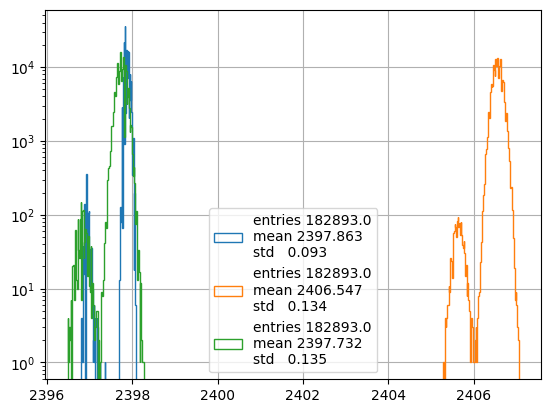

In [25]:
trigger_time_0 = df_extended["Trigger-130_time"];
trigger_time_1 = df_extended["Trigger-131_time"];
trigger_time_2 = df_extended["Trigger-132_time"];

mask = np.isfinite(trigger_time_0) & np.isfinite(trigger_time_1) & np.isfinite(trigger_time_2)

pltext.hist(trigger_time_0[mask], 100, ylog=True);
pltext.hist(trigger_time_1[mask], 100, ylog=True);
pltext.hist(trigger_time_2[mask], 100, ylog=True);

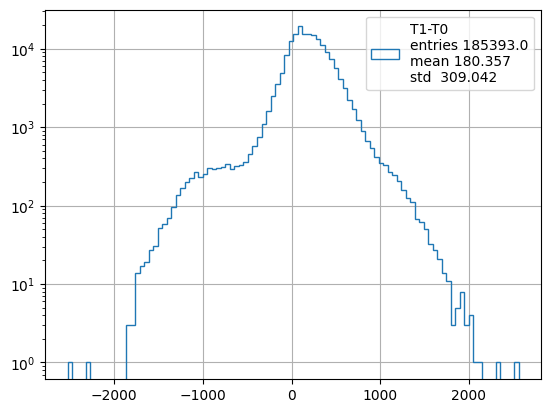

In [28]:
HC_TOF_sel = (np.isnan(df_extended["HC-0_nhits"].values)) & (np.isnan(df_extended["HC-1_nhits"].values)) & (~np.isnan(df_extended["TOF_nhits"].values))

t0 = df_extended["T0_time"]
t1 = df_extended["T1_time"]
trigger_time_0 = df_extended["Trigger-130_time"];

mask = np.isfinite(t0) & np.isfinite(t1) & np.isfinite(trigger_time_0)

# pltext.hist(t0[mask], 100, xylabels=("Time [ns]"), ylog = True, label="T0");
# pltext.hist(t1[mask], 100, ylog = True, label="T1");
pltext.hist(t1[mask]-t0[mask], 100, ylog = True, label="T1-T0");

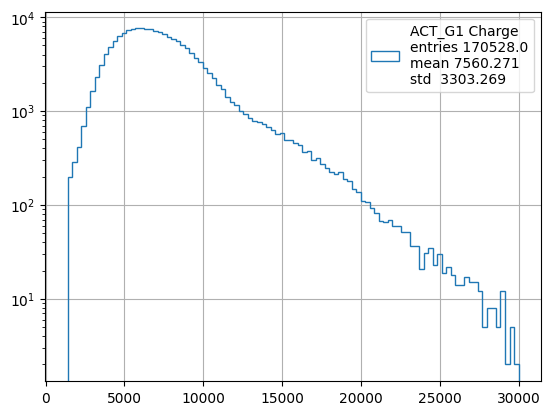

In [48]:
act_g1_charge = df_extended["ACT_g1_charge"]

mask = np.isfinite(act_g1_charge)

pltext.hist(act_g1_charge[mask], 100, ylog = True, label="ACT_G1 Charge", range=(1400, 30000));

In [109]:
print("T0_time con NaN:", np.isnan(df_extended["T0_time"]).sum())
print("T1_time con NaN:", np.isnan(df_extended["T1_time"]).sum())
print("T1-T0_time con NaN:", np.isnan(df_extended["T1-T0_time"]).sum())

T0_time con NaN: 0
T1_time con NaN: 961
T1-T0_time con NaN: 961


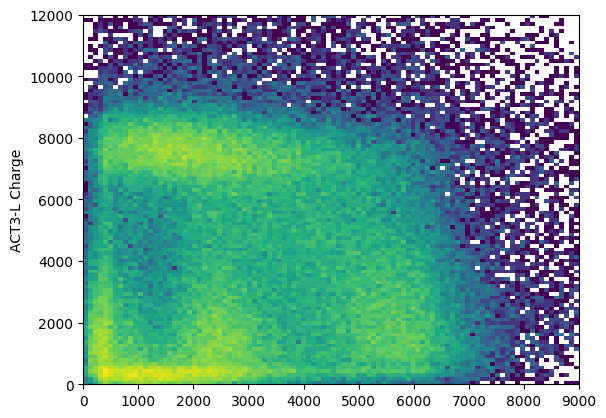

In [59]:
act_3_L_charge = df_extended["ACT3-L_charge"]
act_3_R_charge = df_extended["ACT3-R_charge"]

mask = np.isfinite(act_3_L_charge) & np.isfinite(act_3_R_charge)

plt.hist2d(act_3_L_charge[mask], act_3_R_charge[mask], bins=(100, 100), norm="log", range=((0,9000), (0, 12000)));
plt.ylabel("ACT3-R Charge");
plt.ylabel("ACT3-L Charge");

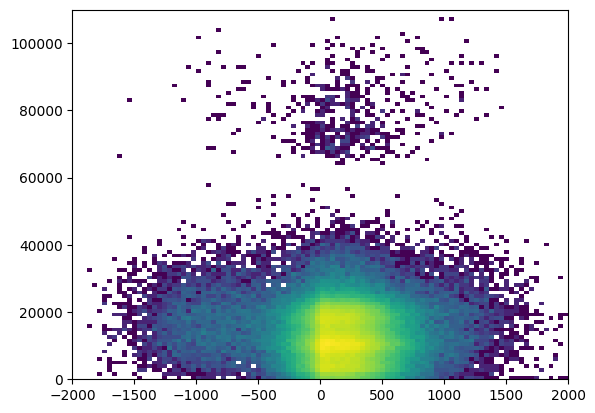

In [88]:
mask = np.isfinite(t1t0_time) & np.isfinite(act_g2_charge)

plt.hist2d(t1t0_time[mask], act_g2_charge[mask], bins=(100, 100), range=((-2000, 2000), (0, 110000)), norm="log");


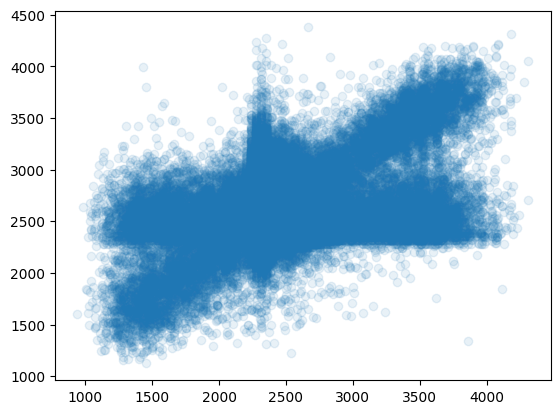

In [ ]:
mask = np.isfinite(t0) & np.isfinite(t1)
plt.scatter(t0[mask], t1[mask], alpha=0.1);

In [127]:
import sys
sys.path.append('/eos/home-d/dcostasr/SWAN_projects/software/hipy')
import hipy.pltext as pltext